# 1. Find missing values (*)

  a) Read in the file "student-mat-missing-data.csv" into a Pandas DataFrame

  b) Do some initial explorations with the methods to get an understanding of the dataset:

> head(), info(), describe(), value_counts(), unique(), columns()

  c) Create a function that takes in a DataFrame as input parameter and plots a barplot with the columns that have missing values. Put this function into a file called data_utils.py. When you come across more useful functions, you can store them in your data_utils module.

  d) Now import your function from the module data_utils and use it to visualize NaNs in your dataset.

  e) Find all rows where the freetime is NaN.

  f) Find all rows where the freetime or the age is NaN.

  g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

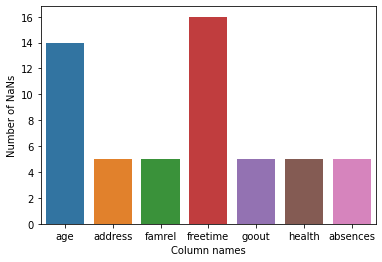

In [113]:
import pandas as pd
import seaborn as sns
import plotly_express as px
import data_utils as du

#a) Read in the file "student-mat-missing-data.csv" into a Pandas DataFrame


df_student_rawdata = pd.read_csv('../data/student-mat-missing-data.csv')

#  b) Do some initial explorations with the methods to get an understanding of the dataset:


# columnes:
# ['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
#       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
#       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
#       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
#       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

#df_student_rawdata["famsup"].unique()
#df_student_rawdata.describe()
# drop "Unnamed: 0", just indeces

# c) Create a function that takes in a DataFrame as input parameter and plots a barplot
#  with the columns that have missing values. Put this function into a file called
#  data_utils.py. When you come across more useful functions, you can store them in your
#  data_utils module.

df_student, Nnans = du.extract_nan_columns(df_student_rawdata)


In [114]:
#   e) Find all rows where the freetime is NaN.
#
#df_student.info()
# All rows with nans
#df_student[df_student.isna().any(axis="columns")]

# All rows where freetime is Nan
df_student[df_student["freetime"].isna() == True]



,age,address,famrel,freetime,goout,health,absences
87,15.0,U,5.0,NaN,3.0,1.0,4.0
99,16.0,U,5.0,NaN,5.0,3.0,0.0
130,15.0,R,4.0,NaN,2.0,5.0,0.0
149,15.0,U,4.0,NaN,5.0,5.0,0.0
151,16.0,U,4.0,NaN,4.0,5.0,6.0
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,19.0,U,4.0,NaN,1.0,1.0,12.0
276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:

#  f) Find all rows where the freetime or the age is NaN.
df_student[df_student["freetime"].isna() | df_student["age"].isna()]


,age,address,famrel,freetime,goout,health,absences
20,NaN,U,4.0,4.0,1.0,1.0,0.0
71,NaN,U,3.0,3.0,3.0,3.0,0.0
87,15.0,U,5.0,NaN,3.0,1.0,4.0
99,16.0,U,5.0,NaN,5.0,3.0,0.0
102,NaN,U,5.0,3.0,3.0,5.0,4.0
106,NaN,U,5.0,1.0,2.0,3.0,8.0
121,NaN,U,5.0,5.0,4.0,5.0,6.0
130,15.0,R,4.0,NaN,2.0,5.0,0.0
149,15.0,U,4.0,NaN,5.0,5.0,0.0
151,16.0,U,4.0,NaN,4.0,5.0,6.0


In [116]:

#  g) You will notice that some rows have several NaNs. Now compute the proportion that these rows constitute of the whole dataset.

# summer antal nans per row

#numbernans = df_student[df_student["freetime"].isna() | df_student["age"].isna()].isna().sum()

totalnans = Nnans.sum()[1]

print(Nnans)
print("")


#df_student.info()
# gives 395 rows, 7 columns, same as sze of dataset
Ndata = df_student.size


nanproportions = totalnans/Ndata
print(f"Proportions of NaNs in total student data set: {nanproportions * 100:.2f}%")
print(f"Proportions of NaNs per columns in student data set (%):\n{Nnans['Number of NaNs']/395 * 100}")




         Column names  Number of NaNs
age               age              14
address       address               5
famrel         famrel               5
freetime     freetime              16
goout           goout               5
health         health               5
absences     absences               5

Proportions of NaNs in total student data set: 1.99%
Proportions of NaNs per columns in student data set (%):
age         3.544304
address     1.265823
famrel      1.265823
freetime    4.050633
goout       1.265823
health      1.265823
absences    1.265823
Name: Number of NaNs, dtype: float64


Proportions of NaN in thes two columns: (age and freetime): 1.08%
Alternative proportions of NaN of these two columns: (age and freetime vs 2*length of columns (395)): 3.80%


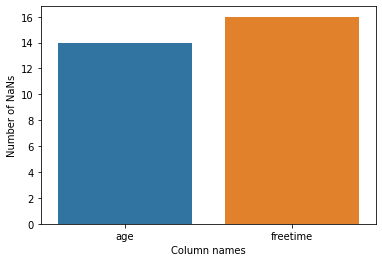

In [117]:
# In these two columns though
#print(f"Proportion of NaN in thes two columns: (age and freetime) {Nnans}")

print(f"Proportions of NaN in thes two columns: (age and freetime): {(Nnans['Number of NaNs'].loc['age'] + Nnans['Number of NaNs'].loc['freetime'])/Ndata*100:.2f}%")
print(f"Alternative proportions of NaN of these two columns: (age and freetime vs 2*length of columns (395)): {(Nnans['Number of NaNs'].loc['age'] + Nnans['Number of NaNs'].loc['freetime'])/(2*395)*100:.2f}%")
# plot

sns.barplot(data=Nnans.loc[["age","freetime"]], x="Column names", y="Number of NaNs");


# 2. Clean the data (*)

<AxesSubplot:xlabel='age', ylabel='Count'>

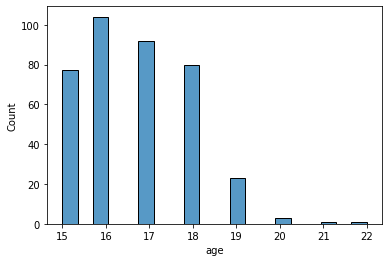

In [118]:
import seaborn as sns
import data_utils as du

# a) As you have conversed with a domain expert you both agree that there are too many missing
#  data to fill in and the proportion is small enough to be safe to just remove. Now remove these
#  rows and use your missing-value utility function visualize the remaining NaNs.

df_studentdata = df_student[["age","freetime"]]

# b) The domain expert has told you that you have to fill in the missing age values. Start with 
# visualising the age distribution in the dataset using a histogram.

sns.histplot(data=df_studentdata, x="age", bins=20)



Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


<AxesSubplot:xlabel='higher', ylabel='Count'>

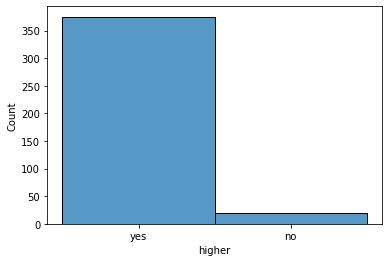

In [119]:
print(df_student_rawdata.columns)

sns.histplot(data=df_student_rawdata, x="higher")


<AxesSubplot:xlabel='age', ylabel='Count'>

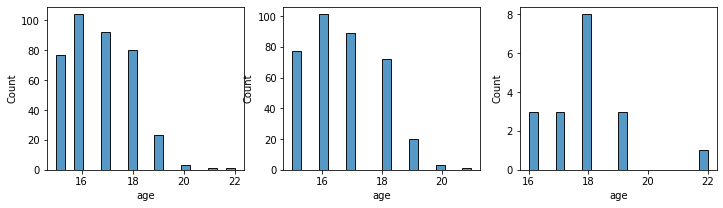

In [120]:
import matplotlib.pyplot as plt

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,3))

sns.histplot(data=df_studentdata, x="age", bins=20, ax=ax1)
sns.histplot(data=df_student_rawdata[df_student_rawdata["higher"] == "yes"], x="age", bins=20, ax=ax2)
sns.histplot(data=df_student_rawdata[df_student_rawdata["higher"] == "no"], x="age", bins=20, ax=ax3)


/tmp/ipykernel_21133/4068333108.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_studentdata["alcohol"] = df_student_rawdata.loc[:,"Dalc"] + df_student_rawdata.loc[:,"Walc"]


      age  freetime  alcohol
0    18.0       3.0        2
1    17.0       3.0        2
2    15.0       3.0        5
3    15.0       2.0        2
4    16.0       3.0        3
..    ...       ...      ...
390  20.0       5.0        9
391  17.0       4.0        7
392  21.0       5.0        6
393  18.0       4.0        7
394  19.0       2.0        6

[395 rows x 3 columns]


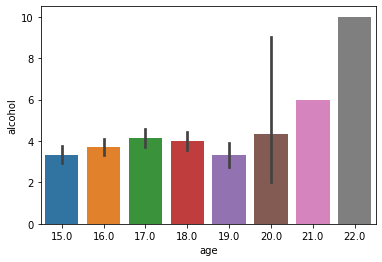

In [121]:
# f) That was hard to find a connection. When reading dataset source we find alcohol consumption, maybe there is some connection between age and alcohol consumption.
#Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
#Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
#  Start with creating a new column called Alcohol, which is a sum of Dalc and Walc columns

#df_studentdata["alcohol"] = df_student_rawdata["Dalc"] + df_student_rawdata["Walc"]

df_studentdata["alcohol"] = df_student_rawdata.loc[:,"Dalc"] + df_student_rawdata.loc[:,"Walc"]

#g) Make a barchart for alcohol consumption vs age.

sns.barplot(data=df_studentdata, x="age", y="alcohol")
print(df_studentdata)

<AxesSubplot:xlabel='age', ylabel='Count'>

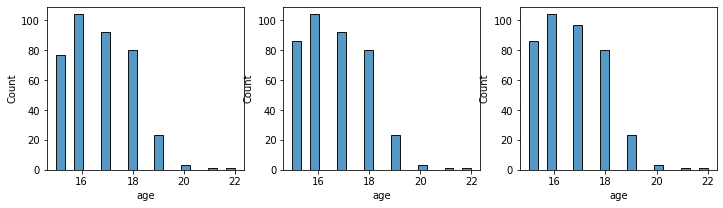

In [122]:
#  h) We see that older students tend to drink more, but notice how few 20-22 year-old students we
#  have in the dataset. We can definitely exclude them when computing the missing values. However
#  there are also few 19 year-old students in the dataset, say for simplicity that we can exclude
#  them as well. This leaves:
#
#alcohol level >= 4 -> 16, 17 or 18 years old -> take median to simplify
#alcohol level < 4 -> 15 years old
#Fill these in and visualize missing values.
#
#  Note: could make more stringent by computing percentages based on the distribution

# Make a copy of studentdata with age, freetime and alcohol, that we do changes in
df_studentdatamod = df_studentdata.copy()

# Change all where alcohol <4 to age 15.
df_studentdatamod[(df_studentdatamod["alcohol"] < 4) & (df_studentdatamod["age"].isna() == True)] = 15

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,3))
sns.histplot(data=df_studentdata, x="age", bins=20, ax=ax1)
sns.histplot(data=df_studentdatamod, x="age", bins=20, ax=ax2)

# Change all where alcohol is >= 4 to median of age
medianage = df_studentdata[
    (df_studentdata["alcohol"] >= 4) & 
    (df_studentdata["age"].isna() == False)]["age"].median()
df_studentdatamod[(df_studentdatamod["alcohol"] >= 4) & (df_studentdatamod["age"].isna() == True)] = medianage

sns.histplot(data=df_studentdatamod, x="age", bins=20, ax=ax3)



# 3. Clean freetime column (**)

Now there are missing data on freetime that needs to be filled.

- Try yourself and find reasonable approaches for how you would fill those missing data.
- Document what you have tried and different findings
- Combine suitable visualizations with pandas methods

unique values in freetime: [ 3.  2.  4.  1.  5. nan]
Number of NaNs in freetime: 16


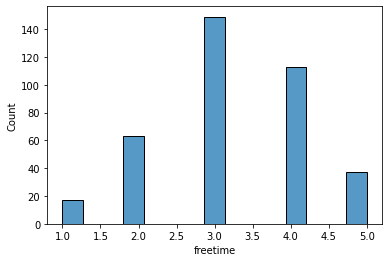

In [142]:
sns.histplot(data=df_studentdata, x="freetime")
print(f"unique values in freetime: {df_studentdata['freetime'].unique()}")
print(f"Number of NaNs in freetime: {df_studentdata[df_studentdata['freetime'].isna() == True]['freetime'].size}")

# TODO hitta ett sätt att byta ut freetime, kanske ålder kan bestämma hur mycket freetime de har
# 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)


In [141]:
df_studentdata[df_studentdata['freetime'].isna() == True]['freetime'].size

16